In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

In [8]:
import rpy2
import numpy as np

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

import rpy2.ipython.html
rpy2.ipython.html.init_printing()

from rpy2.robjects.packages import importr, data


utils = importr('utils')
base = importr('base')
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
def to_rdf(df):
    with (robjects.default_converter + pandas2ri.converter).context():
        rdf = robjects.conversion.get_conversion().py2rpy(df)
    return rdf

def to_df(rdf):
    with (robjects.default_converter + pandas2ri.converter).context():
        df = robjects.conversion.get_conversion().rpy2py(rdf)

    return df



In [10]:
%%R
R.version.string

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"


In addition: Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/dados1/usr/lib/R/site-library’ contains no packages
2: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/dados1/usr/lib/R/site-library’ contains no packages
3: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/dados1/usr/lib/R/site-library’ contains no packages
4: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/dados1/usr/lib/R/site-library’ contains no packages


## Instalar pacotes do R localmente (só para seu usuário)
Talvez é necessário usar
```
utils.install_packages('mirt')
utils.install_packages('mirtCAT')

```
e o equivalente de outros pacotes.


In [11]:
mirt = importr('mirt')
mirtcat = importr("mirtCAT")

In [121]:
df = pd.read_csv('data/ac_1_2009_MT.csv')
df

,60226,60227,60228,60229,60230,60231,60232,60233,58672,60235,...,60263,58675,60244,60242,60240,60238,60234,acertos,caderno,nota_inep
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,10,61,415.6
1,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,9,61,433.2
2,0,0,0,0,1,1,1,0,1,1,...,0,0,0,0,0,1,0,13,61,564.7
3,0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,11,61,495.7
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,14,61,496.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22478,0,0,0,0,1,0,0,1,1,1,...,1,0,1,1,0,1,0,14,64,473.9
22479,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,8,64,361.3
22480,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,64,412.9
22481,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,9,64,431.3


In [122]:
resp = df.iloc[:,:-3]
resp

,60226,60227,60228,60229,60230,60231,60232,60233,58672,60235,...,59010,60260,60262,60263,58675,60244,60242,60240,60238,60234
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,1,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22478,0,0,0,0,1,0,0,1,1,1,...,1,0,0,1,0,1,1,0,1,0
22479,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
22480,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22481,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [123]:
rdf = to_rdf(resp)
rdf

,,60226,60227,60228,60229,...,60238,60234
0,0,0,0,0,0,...,0,1
1,1,0,0,0,1,...,1,0
2,2,0,0,0,0,...,1,0
3,3,0,0,0,0,...,1,0
4,4,0,0,1,0,...,0,1
5,5,1,0,0,0,...,0,0
6,6,1,0,1,0,...,1,1
7,7,1,0,1,0,...,1,0
...,...,...,...,...,...,...,...,...
22481,22481,0,0,0,0,...,0,0


In [124]:
istats = mirt.itemstats(rdf)
istats = to_df(istats[1])
print(len(istats)," items")
istats.sort_values("mean")


43  items


,N,mean,sd,total.r,total.r_if_rm,alpha_if_rm
60227,22483,0.107948,0.310322,0.274955,0.204913,0.575712
60259,22483,0.110350,0.313333,0.228541,0.156400,0.578879
60247,22483,0.114620,0.318570,0.200768,0.126713,0.580820
60237,22483,0.115999,0.320231,0.129619,0.053975,0.585704
60240,22483,0.137660,0.344550,0.112698,0.031088,0.587617
60229,22483,0.142107,0.349168,0.260318,0.180737,0.576687
60250,22483,0.164747,0.370960,0.137725,0.050077,0.586614
60263,22483,0.173909,0.379040,0.144354,0.054865,0.586355
60233,22483,0.180536,0.384642,0.180938,0.090755,0.583543
58608,22483,0.180937,0.384974,0.391345,0.309904,0.565455


In [125]:
%time model3pl = mirt.mirt(rdf,1,itemtype="3PL",method="EM",SE=True)


Iteration: 500, Log-Lik: -505705.409, Max-Change: 0.00061

R[write to console]: EM cycles terminated after 500 iterations.





Calculating information matrix...
CPU times: user 2min 48s, sys: 336 ms, total: 2min 49s
Wall time: 2min 48s


In [126]:
%%R -i model3pl -o coef3pl
coef3pl = coef(model3pl,simplify=FALSE,IRTpars=TRUE,printSE=TRUE,verbose=TRUE)


In addition: Warning message:
Could not invert information matrix; model may not be empirically identified. 


In [128]:
[value for key,value in to_df(coef3pl).items()]

[array([[2.76231806, 1.30043241, 0.15202117, 1.        ]]),
 array([[2.21646148, 2.27658518, 0.0717577 , 1.        ]]),
 array([[2.8538136 , 2.20172915, 0.25450179, 1.        ]]),
 array([[3.72708446, 2.11532731, 0.11652359, 1.        ]]),
 array([[1.70308147, 0.86223266, 0.17269617, 1.        ]]),
 array([[2.80096118, 1.958212  , 0.1896919 , 1.        ]]),
 array([[1.15888369, 1.32629784, 0.13617995, 1.        ]]),
 array([[2.35378104, 2.65822133, 0.16550888, 1.        ]]),
 array([[3.69712586, 2.56792298, 0.24964517, 1.        ]]),
 array([[1.14020449, 0.09164584, 0.05861713, 1.        ]]),
 array([[4.98747651, 2.52097698, 0.10854945, 1.        ]]),
 array([[0.28060725, 2.94241706, 0.01938688, 1.        ]]),
 array([[1.73757405, 1.17220326, 0.20371205, 1.        ]]),
 array([[ 1.13277224, -0.81318843,  0.00874235,  1.        ]]),
 array([[1.88485326, 1.93674055, 0.16551901, 1.        ]]),
 array([[2.06002347, 2.34170336, 0.23361103, 1.        ]]),
 array([[1.43917422, 1.66689217, 0.1

In [129]:
coef3pl = to_df(coef3pl)
#coef3pl = pd.DataFrame([np.concatenate([value[0],value[1]]) for key,value in coef3pl.items()],index=coef3pl.keys(),columns=['a','b','c','u','a_se','b_se','c_se','u_se'])
# se o coef acima não fornece erros padrão
coef3pl = pd.DataFrame([value[0] for key,value in coef3pl.items()],index=coef3pl.keys(),columns=['a','b','c','u'])
coef3pl = coef3pl.drop(index="GroupPars")
coef3pl = coef3pl.set_index(coef3pl.index.astype('int'))
coef3pl.sort_values('b')

,a,b,c,u
60242,-0.000731,-2181.869673,0.062761,1.0
59484,1.132772,-0.813188,0.008742,1.0
60235,1.140204,0.091646,0.058617,1.0
60230,1.703081,0.862233,0.172696,1.0
60241,1.737574,1.172203,0.203712,1.0
60226,2.762318,1.300432,0.152021,1.0
60232,1.158884,1.326298,0.136180,1.0
58784,3.075063,1.508979,0.181643,1.0
58608,3.383449,1.638799,0.114871,1.0
60246,1.439174,1.666892,0.157452,1.0


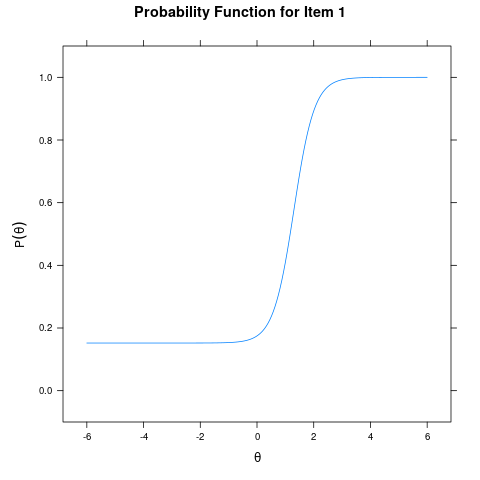

In [130]:
%%R -i model3pl
itemplot(model3pl,1)

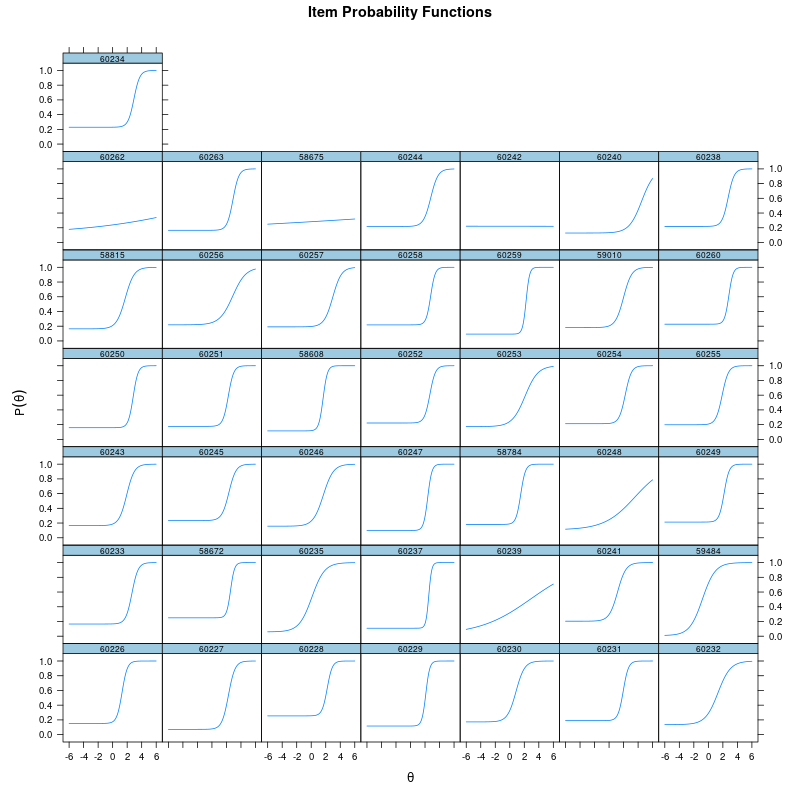

In [131]:
%%R -w 800 -h 800
plot(model3pl,type="trace", facet_items=TRUE)

In [132]:
thetas3pleap = mirt.fscores(model3pl,method="EAP",full_scores=True,full_scores_SE=True)

In [133]:
to_df(thetas3pleap)[:,1]

array([0.66739171, 0.70491709, 0.59671359, ..., 0.6232709 , 0.71168248,
       0.73248703])

In [134]:
df['theta3pleap'] = to_df(thetas3pleap)[:,0]
df['theta3pleapse'] = to_df(thetas3pleap)[:,1]


In [135]:
df

,60226,60227,60228,60229,60230,60231,60232,60233,58672,60235,...,60244,60242,60240,60238,60234,acertos,caderno,nota_inep,theta3pleap,theta3pleapse
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,10,61,415.6,-0.611908,0.667392
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,9,61,433.2,-0.614435,0.704917
2,0,0,0,0,1,1,1,0,1,1,...,0,0,0,1,0,13,61,564.7,0.501007,0.596714
3,0,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,11,61,495.7,-0.130096,0.786733
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,14,61,496.1,-0.073793,0.716364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22478,0,0,0,0,1,0,0,1,1,1,...,1,1,0,1,0,14,64,473.9,-0.266403,0.743088
22479,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,8,64,361.3,-1.081769,0.695463
22480,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,6,64,412.9,-0.606424,0.623271
22481,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,9,64,431.3,-0.452390,0.711682


/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='theta3pleap', ylabel='Count'>

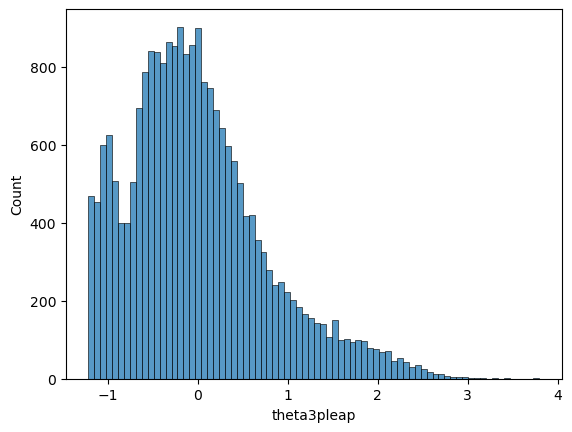

In [137]:
sns.histplot(df,x='theta3pleap')

In [138]:
df[['nota_inep','theta3pleap']].corr()

,nota_inep,theta3pleap
nota_inep,1.000000,0.997718
theta3pleap,0.997718,1.000000


<ErrorbarContainer object of 3 artists>

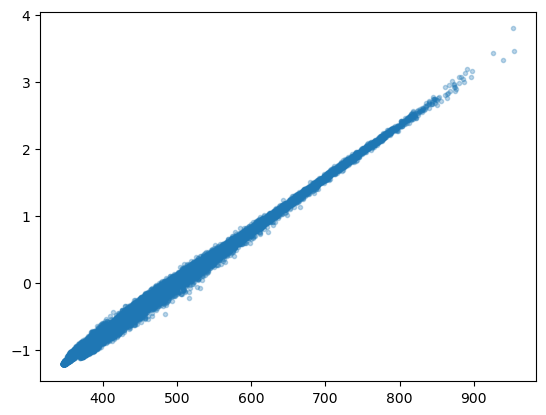

In [139]:
#plt.errorbar(df['nota_inep'],df['theta3pleap'],yerr=df['theta3pleapse'],fmt=".",alpha=0.3)
plt.errorbar(df['nota_inep'],df['theta3pleap'],fmt=".",alpha=0.3)

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Nota modelo 3PL')

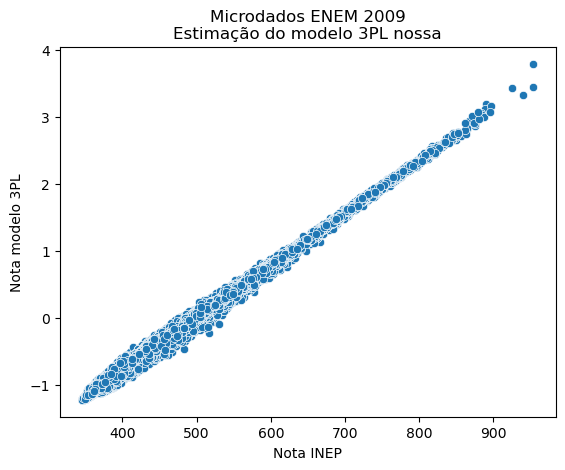

In [140]:
ax = sns.scatterplot(df,y='theta3pleap',x='nota_inep')
ax.set_title("Microdados ENEM 2009\nEstimação do modelo 3PL nossa")
ax.set_xlabel("Nota INEP")
ax.set_ylabel("Nota modelo 3PL")
#sns.scatterplot(df,x='acertos',y='theta3plmap')

## INEP Item coefficients 

In [142]:
itens = pd.read_csv('../inep/enem/2009/DADOS/ITENS_PROVA_2009-utf8.csv',sep=';')

In [143]:
itens[:2]

,CO_POSICAO,SG_AREA,CO_ITEM,TX_GABARITO,CO_HABILIDADE,IN_ITEM_ABAN,TX_MOTIVO_ABAN,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,TX_COR,CO_PROVA
0,46,CH,60181.0,A,NaN,0,NaN,0.70844,-0.23821,0.02167,AZUL,53
1,46,CH,60181.0,A,NaN,0,NaN,0.70844,-0.23821,0.02167,AMARELO,54


In [144]:
df[:2]

,60226,60227,60228,60229,60230,60231,60232,60233,58672,60235,...,60244,60242,60240,60238,60234,acertos,caderno,nota_inep,theta3pleap,theta3pleapse
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,10,61,415.6,-0.611908,0.667392
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,9,61,433.2,-0.614435,0.704917


In [145]:
df.columns[:-5]

Index(['60226', '60227', '60228', '60229', '60230', '60231', '60232', '60233',
       '58672', '60235', '60237', '60239', '60241', '59484', '60243', '60245',
       '60246', '60247', '58784', '60248', '60249', '60250', '60251', '58608',
       '60252', '60253', '60254', '60255', '58815', '60256', '60257', '60258',
       '60259', '59010', '60260', '60262', '60263', '58675', '60244', '60242',
       '60240', '60238', '60234'],
      dtype='object')

In [146]:
cols = df.columns[:-5].astype('int')
params = itens[itens["CO_ITEM"].isin(cols)].drop_duplicates("CO_ITEM")
params = params[["CO_ITEM","NU_PARAM_A","NU_PARAM_B","NU_PARAM_C"]]
params = params.set_index("CO_ITEM")
params = params.sort_index(axis=0)
params.columns = ["a1","d","g"]
params['u'] = 1


In [147]:
comp_coef = pd.merge(coef3pl,params,left_index=True,right_index=True)
comp_coef

,a,b,c,u_x,a1,d,g,u_y
60226.0,2.762318,1.300432,0.152021,1.0,2.70316,1.28868,0.13945,1
60227.0,2.216461,2.276585,0.071758,1.0,2.45160,2.26159,0.07674,1
60228.0,2.853814,2.201729,0.254502,1.0,2.18226,2.25808,0.24918,1
60229.0,3.727084,2.115327,0.116524,1.0,3.40407,2.10238,0.10698,1
60230.0,1.703081,0.862233,0.172696,1.0,1.76793,0.79745,0.17243,1
60231.0,2.800961,1.958212,0.189692,1.0,2.86703,1.91260,0.19442,1
60232.0,1.158884,1.326298,0.136180,1.0,1.38979,1.27326,0.18155,1
60233.0,2.353781,2.658221,0.165509,1.0,2.02435,2.59979,0.15523,1
58672.0,3.697126,2.567923,0.249645,1.0,3.55003,2.41723,0.23666,1
60235.0,1.140204,0.091646,0.058617,1.0,1.21921,0.13076,0.08474,1


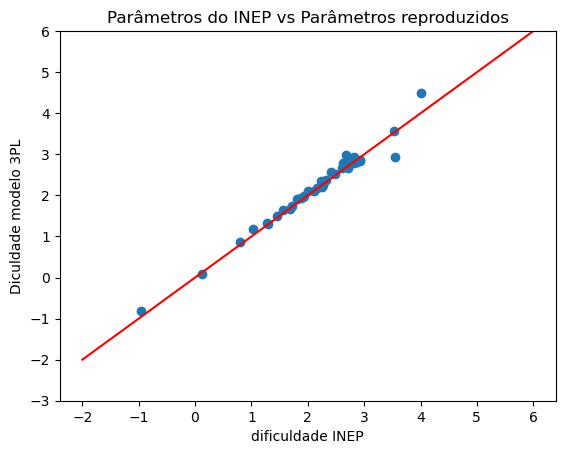

In [153]:
#plt.errorbar(comp_coef['d'],comp_coef['b'],yerr=comp_coef['b_se'],fmt='o')
plt.scatter(comp_coef['d'],comp_coef['b'])
plt.plot([-2,6],[-2,6],'r')
ax = plt.gca()
ax.set_ylim(-3,6)
ax.set_title("Parâmetros do INEP vs Parâmetros reproduzidos")
ax.set_ylabel("Diculdade modelo 3PL");
ax.set_xlabel("dificuldade INEP");

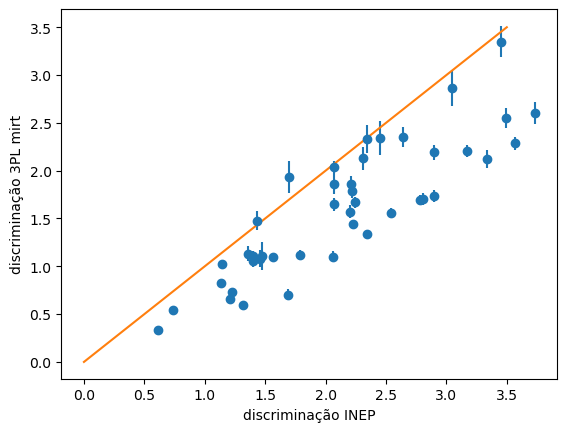

In [69]:
plt.errorbar(comp_coef['a1'],comp_coef['a'],yerr=comp_coef['a_se'],fmt='o')
plt.plot([0,3.5],[0,3.5])
ax = plt.gca()
ax.set_ylabel("discriminação 3PL mirt");
ax.set_xlabel("discriminação INEP");

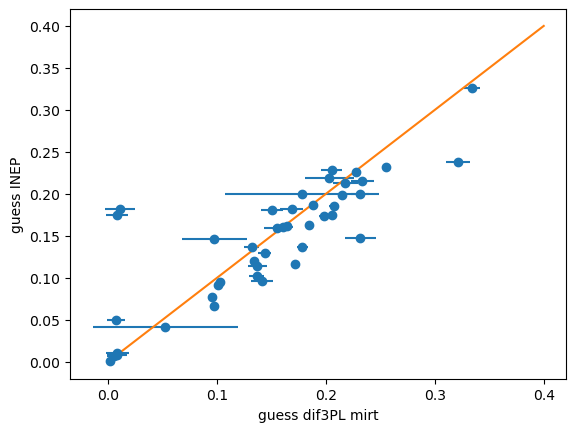

In [40]:
plt.errorbar(comp_coef['c'],comp_coef['g'],xerr=comp_coef['c_se'],fmt='o')
plt.plot([0,0.4],[0,0.4])
ax = plt.gca()
ax.set_xlabel("guess dif3PL mirt");
ax.set_ylabel("guess INEP");

In [41]:
params_m = mirt.traditional2mirt(to_rdf(params),"3PL")
mod_inep = mirtcat.generate_mirt_object(params_m,itemtype = '3PL')

In [42]:
thetas = to_rdf(pd.Series(np.arange(-4,4,0.01)))
thetas

<rpy2.rinterface.FloatSexpVector object at 0x7f17d1fd5a40> [RTYPES.REALSXP]

In [43]:
to_df(mirt.testinfo(model3pl,thetas))

array([ 0.13795817,  0.13916691,  0.14038617,  0.14161601,  0.14285654,
        0.14410783,  0.14536998,  0.14664308,  0.14792722,  0.14922248,
        0.15052898,  0.15184678,  0.153176  ,  0.15451672,  0.15586903,
        0.15723304,  0.15860883,  0.15999651,  0.16139618,  0.16280792,
        0.16423184,  0.16566805,  0.16711662,  0.16857768,  0.17005132,
        0.17153764,  0.17303674,  0.17454873,  0.17607372,  0.1776118 ,
        0.17916308,  0.18072767,  0.18230568,  0.1838972 ,  0.18550236,
        0.18712126,  0.18875401,  0.19040072,  0.19206149,  0.19373645,
        0.19542571,  0.19712937,  0.19884755,  0.20058037,  0.20232794,
        0.20409038,  0.20586781,  0.20766033,  0.20946808,  0.21129117,
        0.21312971,  0.21498384,  0.21685367,  0.21873932,  0.22064092,
        0.22255859,  0.22449246,  0.22644264,  0.22840927,  0.23039247,
        0.23239238,  0.23440911,  0.2364428 ,  0.23849358,  0.24056158,
        0.24264693,  0.24474976,  0.24687021,  0.24900841,  0.25

<AxesSubplot:>

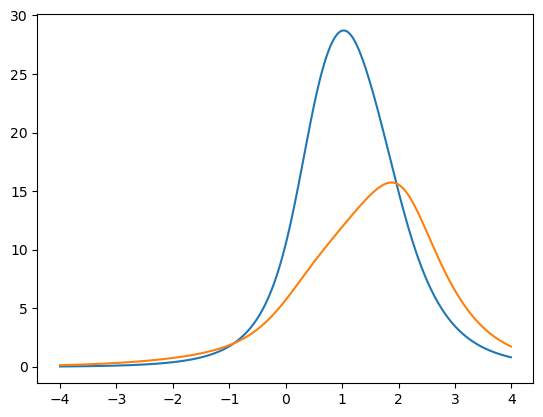

In [44]:
sns.lineplot(x=thetas,y=to_df(mirt.testinfo(mod_inep,thetas)))
sns.lineplot(x=thetas,y=to_df(mirt.testinfo(model3pl,thetas)))

In [45]:
1/np.sqrt(30)*slope

NameError: name 'slope' is not defined

In [214]:
mirt.logLik(model3pl)

-791320.8296484486


In [53]:
resp = df.iloc[:,range(43)]
resp.columns = resp.columns.astype("int")

In [54]:
resp = resp.sort_index(axis=1)
resp

,11601,33960,66219,66498,77940,78903,81689,83820,84147,84769,...,118022,118024,118029,118033,118034,118038,118054,118108,118125,118158
0,0,0,0,1,1,0,0,1,1,0,...,0,0,0,1,0,0,1,1,1,0
1,1,0,0,0,0,1,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
2,0,1,0,1,1,1,0,1,1,1,...,1,0,0,0,0,1,0,1,1,1
3,0,1,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,1
4,0,0,1,1,0,1,0,1,1,0,...,0,0,1,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31497,0,0,0,0,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1
31498,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,1,1,1,0
31499,1,0,0,0,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
31500,0,0,1,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,1,0


In [55]:
%time inepthetas_eap= mirt.fscores(mod_inep,method="EAP",full_scores=True, full_scores_SE = True,returnER=True,verbose=True ,response_pattern = to_rdf(resp))


CPU times: user 19 s, sys: 0 ns, total: 19 s
Wall time: 19 s


In [57]:
df['inepthetas_eap'] = to_df(inepthetas_eap)[:,0]
df['inepthetasse_eap'] = to_df(inepthetas_eap)[:,1]

In [70]:
df.sort_values('inepthetas_eap',ascending=False)

,86751,83820,77940,118034,84811,96447,96302,111820,118033,84769,...,118108,66219,111877,acertos,caderno,nota_inep,theta3pleap,theta3pleapse,inepthetas_eap,inepthetasse_eap
26612,1,1,1,1,1,1,1,1,1,1,...,1,1,1,42,507,787.4,3.059648,0.383892,2.546144,0.357871
11264,1,1,1,1,1,1,1,1,1,1,...,1,1,1,42,510,770.9,2.889337,0.351506,2.398971,0.326471
11025,1,1,1,1,1,1,1,1,1,1,...,1,1,1,41,510,765.7,2.787690,0.327265,2.352718,0.313076
10367,1,1,1,1,1,1,1,1,1,1,...,1,1,1,40,510,761.9,2.819340,0.335558,2.318918,0.308350
8803,1,1,1,1,1,1,1,1,1,1,...,1,1,1,40,510,760.0,2.791592,0.332149,2.301580,0.306113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,510,316.5,-1.952199,0.621786,-1.648256,0.588302
31269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,507,315.9,-1.953162,0.621389,-1.653506,0.586747
2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,508,315.9,-1.953162,0.621389,-1.653506,0.586747
21980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,509,315.9,-1.953162,0.621389,-1.653506,0.586747


In [71]:
0.38*slope

42.67460971504481

In [58]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

112.3016045132758 501.49257989752016


0.7085784040769558

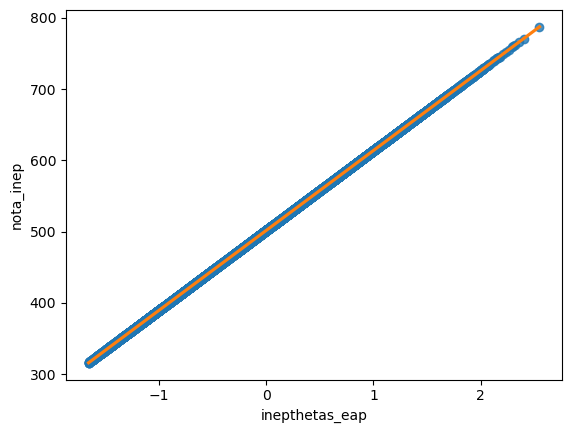

In [59]:
x = 'inepthetas_eap'
xs = 'inepthetasse_eap'

y = 'nota_inep'
df[x].dropna(inplace=True)
sns.regplot(df,x=x,y=y,ci=None,line_kws={"color": "C1"})
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df[y])
print(slope,intercept)
df[x].std()

In [60]:
.71*112

79.52

<AxesSubplot:xlabel='acertos', ylabel='Count'>

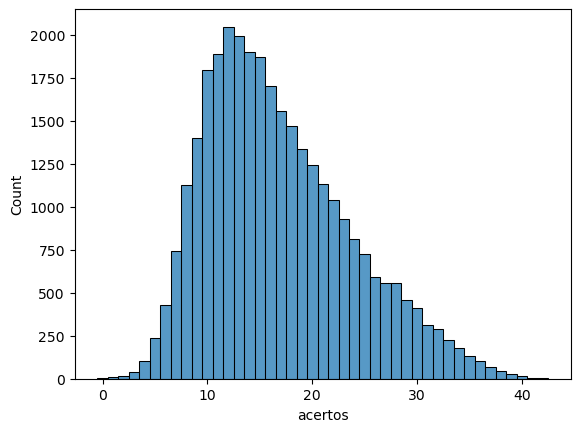

In [170]:
sns.histplot(df['acertos'],discrete=True)

<AxesSubplot:xlabel='inepthetas_eap', ylabel='inepthetasse_eap'>

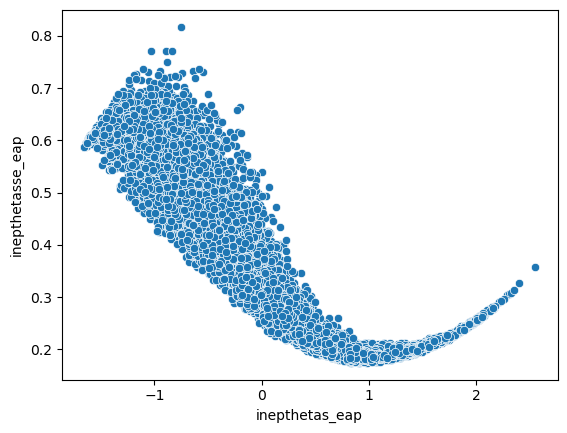

In [61]:
sns.scatterplot(df,x='inepthetas_eap',y='inepthetasse_eap')

Text(0.5, 1.0, 'Reprodução das notas do ENEM 2019\na partir do microdados')

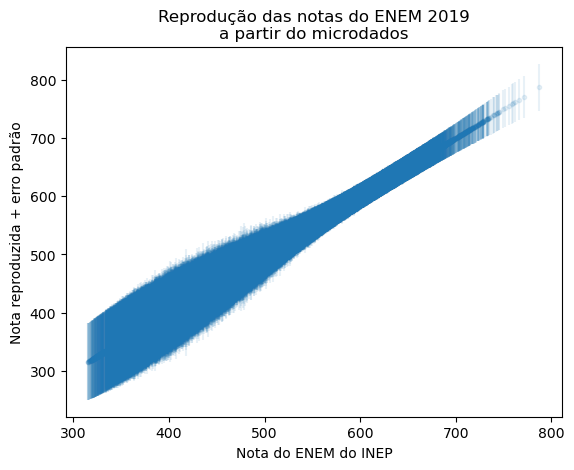

In [64]:
plt.errorbar(df['nota_inep'],df[x]*slope+intercept,yerr=df[xs]*slope,fmt=".",alpha=0.1)
ax = plt.gca()
ax.set_xlabel("Nota do ENEM do INEP")
ax.set_ylabel("Nota reproduzida + erro padrão")
ax.set_title("Reprodução das notas do ENEM 2019\na partir do microdados");


<AxesSubplot:xlabel='inepthetas_eap'>

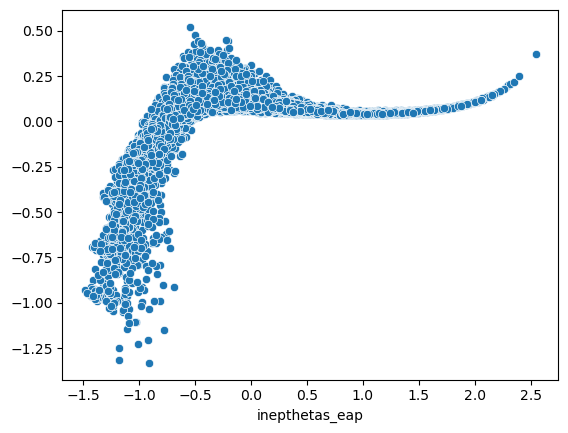

In [188]:
sns.scatterplot(x=df['inepthetas_eap'],y=(df['inepthetas_ml']-df['inepthetas_eap']))

In [46]:
resp0 = resp.iloc[0:10]
resp0

,86751,83820,77940,118034,84811,96447,96302,111820,118033,84769,...,118054,66498,88308,87709,112135,81689,97975,118108,66219,111877
0,0,1,1,0,0,1,0,0,1,0,...,1,1,0,0,1,0,0,1,0,0
1,0,1,0,0,1,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
2,0,1,1,0,1,1,0,0,0,1,...,0,1,1,0,1,0,0,1,0,1
3,0,1,1,0,1,1,1,0,0,1,...,0,1,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,0
5,0,1,1,0,1,1,0,1,1,1,...,0,1,0,0,0,0,0,0,1,1
6,0,1,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
8,0,1,1,0,1,1,1,0,1,1,...,0,1,0,1,1,0,1,1,1,0
9,0,1,1,1,0,1,1,0,1,0,...,0,1,1,0,1,1,0,1,0,0


In [52]:
%%R -i mod_inep,resp0,resp,model3pl
respvec <- rep(0,43)
fscores(mod_inep,method="EAP",full.scores=TRUE,full.scores_SE = TRUE,verbose=TRUE,response.pattern = respvec)

            F1     SE_F1
[1,] -1.653506 0.5867472


In [68]:
respvec = [1]*43

In [71]:
mirt.fscores(mod_inep,method="EAP",full_scores=True, full_scores_SE = True,verbose=True ,response_pattern = to_rdf(respvec))


2.9936527317926926,0.4641611263840843
